# Example showing how mix python and madagascar processing #

This notebook:
    * creates spike.rsf data using sfspike abnd sfbandlimit
    * opens the spike.rsf file as input
    * open a new clip.rsf file as output
    * one trace at a time
        * read a trace
        * clip amplitudes
        * write a trace
    * plots input and output with sfwiggle
    * close the files.  
    * repeat 
        * read all traces into memory
        * clip
        * plot using matplotlib.pyplot.imshow
    
The notebook can be run in Python 3 (using git updates from m8r.py and doc.py on July 27, 2018)
and Madagascar built with Python 2.  m8r.py has been tested for both Python 2 and Python 3.

In [1]:
# basic imports.  
import os
import numpy as np
import matplotlib
# use the nbagg backend to render plot.  It provides basic zoom and pan capability.
matplotlib.use('nbagg') # previously I used this magic command: %matplotlib inline
# I think import matplotlib.pyplot must be after matplotlib.use('nbagg') 
import matplotlib.pyplot as plt

#m8r library provides read and write of madagascar data
import m8r 

local copy


In [2]:
os.system('sfspike n1=1000 n2=100 n3=10 nsp=1 k1=500 | sfbandpass fhi=20 phase=y > spike.rsf') 

0

In [3]:
inp  = m8r.Input('spike.rsf')
output = m8r.Output('clip.rsf')

n1 = inp.int("n1")
n2 = inp.size(1)

clip = 0.05

for i2 in xrange(n2): # loop over traces
    # read one trace using the shape parameter
    # data type comes from input file.  This data is single precision float
    trace=inp.read(shape=(n1))
    trace = np.clip(trace,-clip,clip)
    output.write(trace)
output.close()

In [4]:
# use sfattr to see if amplitude was clipped.  Look in the terminal to see print.
os.system('sfattr <spike.rsf ')
os.system('sfattr <clip.rsf ')

0

In [5]:
# plot spike.rsf using sfwiggle
os.system('sfwiggle <spike.rsf | sfpen&')
# plot clip.rsf using sfwiggle
os.system('sfwiggle <clip.rsf | sfpen&')

0

In [6]:
inp.close()
inp=m8r.Input("spike.rsf")
alltraces=inp.read()


In [7]:
# remove '#' on next line to dump part of the data
#alltraces

In [8]:
alltraces.shape

(10, 100, 1000)

<IPython.core.display.Javascript object>


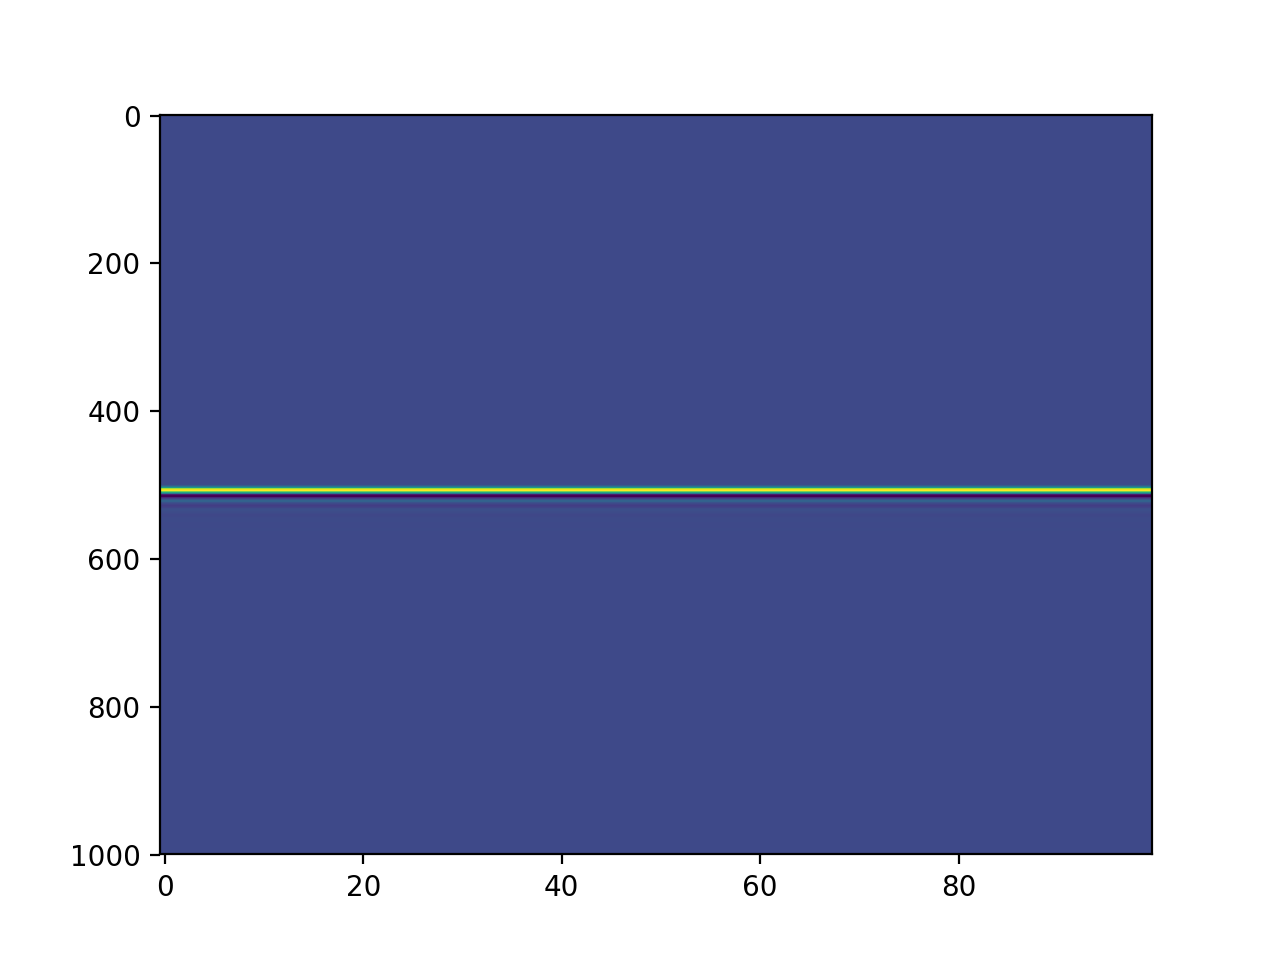

In [9]:
#select a 2D slice from the 3D array alltraces, plot it with imshow seismic data - fastest axis down
plt.imshow(alltraces[0,:,:].T,aspect='auto')
plt.show()

#experiment with zoom plot 

<IPython.core.display.Javascript object>


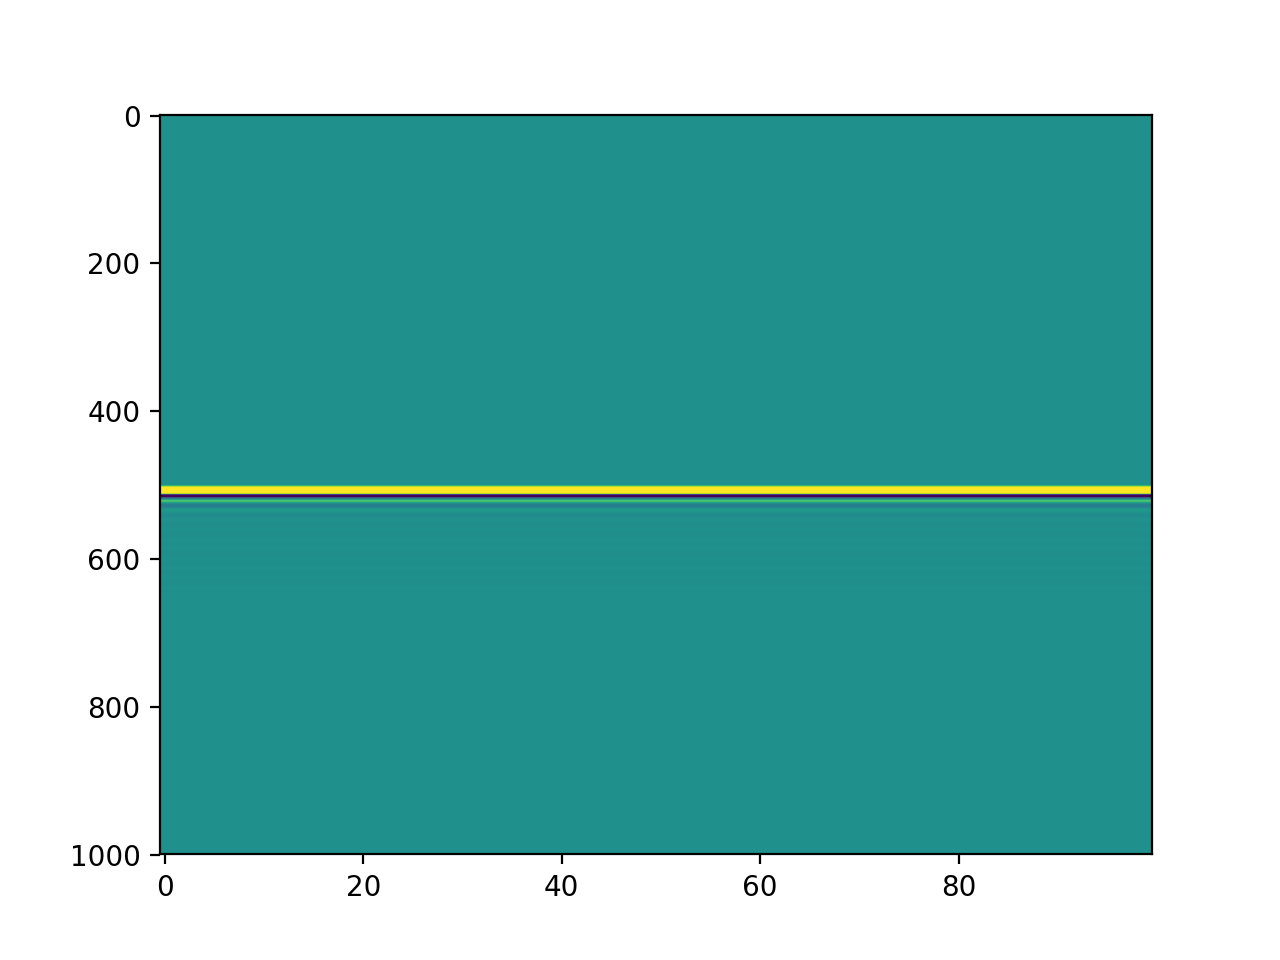

In [10]:
allclip = np.clip(alltraces,-clip,clip)
#select a 2D slice from the 3D array alltraces, plot it with imshow seismic data - fastest axis down
plt.imshow(allclip[0,:,:].T,aspect='auto')
plt.show()

#experiment with zoom plot 

In [11]:
#challenge - plot alltraces and allclip side by side
